In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
#wczytanie danych
df = pd.read_csv("dane_zrodlowe/ObesityDataSet_raw_and_data_sinthetic.csv")
df.head(485)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,Female,18.0,1.57,50.0,no,yes,2.0,3.0,Sometimes,no,1.0,no,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
481,Male,18.0,1.74,64.0,yes,yes,3.0,4.0,Sometimes,no,1.0,yes,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
482,Female,20.0,1.58,53.5,yes,yes,2.0,1.0,Frequently,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
483,Female,18.0,1.50,58.0,no,yes,2.0,3.0,Sometimes,no,1.0,no,0.0,0.0,no,Public_Transportation,Overweight_Level_I


In [175]:
df485 = df.head(485)

Zestaw danych został skompletowany na podstawie 16 pytań w ankiecie przeprowadzonej na terytorium Meksyku, Peru i Kolumbii na grupie 485 osób. \
Dla danych pochodzących z ankiet obliczono BMI (Waga / Wysokośc ** 2), a następnie skategoryzowane je w następujący sposób 
- **Underweight:** BMI Less than 18.5 
- **Normal:** BMI 18.5 to 24.9 
- **Overweight I:** BMI 25.0 to 26.9 
- **Overweight:** BMI 27.0 to 29.9 
- **Obesity I:** BMI 30.0 to 34.9 
- **Obesity II:** BMI 35.0 to 39.9 
- **Obesity III:** BMI Higher than 40 \
Tak wygląda rozkład przynależności do danej kategorii :

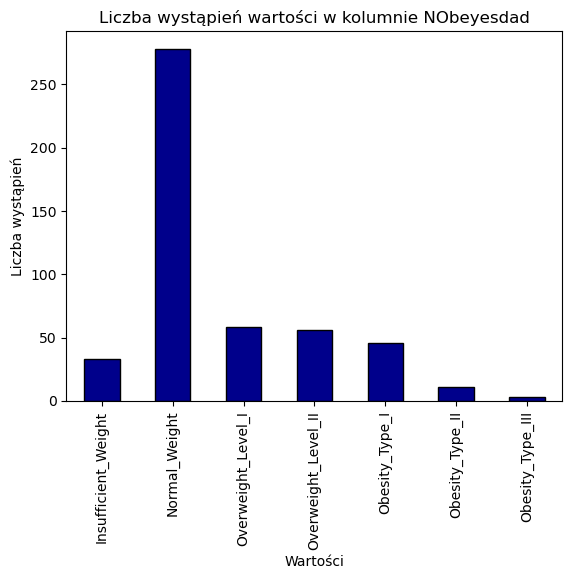

In [176]:
# Zliczenie wystąpień
counts = df485['NObeyesdad'].value_counts()
# Ustawienie kolejności
custom_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II' , 'Obesity_Type_I' , 'Obesity_Type_II' , 'Obesity_Type_III']
counts = counts.reindex(custom_order)
# Tworzenie barplotu
counts.plot(kind='bar', color='darkblue', edgecolor='black')
plt.title('Liczba wystąpień wartości w kolumnie NObeyesdad')
plt.xlabel('Wartości')
plt.ylabel('Liczba wystąpień')
plt.show()


W związku z nierównomiernym rozłożeniem kategorii w celach wykorzystania danych do algorytmów uczenia maszynowego postanowiono syntetycznie wygenerować dane, tak aby zrównoważyć liczbę rekordów należących do poszczególnych kategorii. Zastosowano procedurę SMOTE (Synthetic Minority Over-Sampling Technique) działającej na zasadzie dopasowania do k-najbliższych sąsiądów. Po zastosowaniu procedury dla każdej kategorii otrzymano 2111 rekordów. \
Przynależność do kategorii w całym zestawie danych (wraz z danymi syntetycznymi) wygląda następująco:

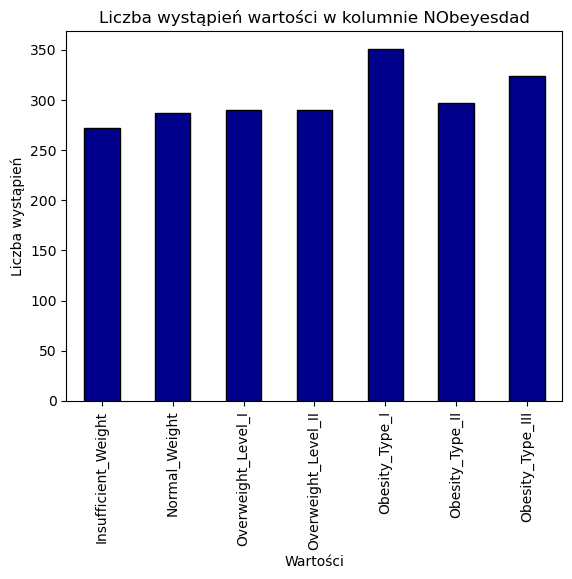

In [177]:
# Zliczenie wystąpień
counts = df['NObeyesdad'].value_counts()
# Ustawienie kolejności
custom_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II' , 'Obesity_Type_I' , 'Obesity_Type_II' , 'Obesity_Type_III']
counts = counts.reindex(custom_order)
# Tworzenie barplotu
counts.plot(kind='bar', color='darkblue', edgecolor='black')
plt.title('Liczba wystąpień wartości w kolumnie NObeyesdad')
plt.xlabel('Wartości')
plt.ylabel('Liczba wystąpień')
plt.show()

Zmienną objaśnianą jest [NObeyesdad]. Jest to zmienna jakościowa z kategoriami obliczonymi na podstawie
BMI = Weight / Height**2 poprawioną o normy dla latynoskich grup społecznych. \
W danych widzimy, że klasyfikacja niejednoznacznie kategoryzuje BMI:. 

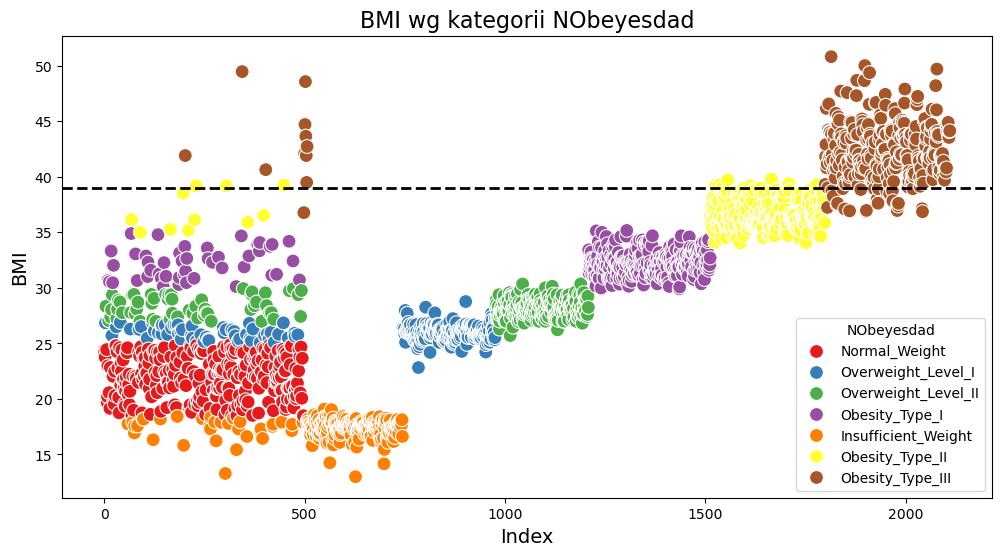

In [178]:
# Dodanie BMI
df["BMI"] = df["Weight"] / df["Height"]**2 
# Scatter plot, który pokazuje kategorię NObeyesdad wg BMI
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df.index, y='BMI', hue='NObeyesdad', data=df, palette='Set1', s=100)
plt.title('BMI wg kategorii NObeyesdad', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.legend(title='NObeyesdad')
plt.axhline(y=39, color='black', linestyle='--', linewidth=2, label='BMI = 39')
plt.show()

Na powyższym wykresie widzimy w jakiej kolejności generowane były syntetyczne dane. \
Widzimy stąd, że źródłowe NObeyesdad nie jest poprawnie określone. Występują rekordy, dla których, dla danego BMI przypisywane są, różne kategorie np. dla BMI = 39 przypisane jest Obesity II i Obesity III.\
W związku z tym wprowadzimy kolumnę BMIclassification, która będzie przyjmowała następujęce wartości w zależności od BMI:

- **Underweight:** BMI Less than 18.5 
- **Normal:** BMI 18.5 to 24.9 
- **Overweight I:** BMI 25.0 to 26.9 
- **Overweight:** BMI 27.0 to 29.9 
- **Obesity I:** BMI 30.0 to 34.9 
- **Obesity II:** BMI 35.0 to 39.9 
- **Obesity III:** BMI Higher than 40 \



In [179]:
# Zdefiniowane zakresu BMI
def bmi_to_category(bmi):
    if  bmi < 18.5:
        return 'Insufficient_Weight'
    elif 18.5 <= bmi < 25 :
        return 'Normal_Weight'
    elif 25 <= bmi < 27:
        return 'Overweight_Level_I'
    elif 27 <= bmi < 30:
        return 'Overweight_Level_II'
    elif 30 <= bmi < 35:
        return 'Obesity_Type_I'
    elif 35 <= bmi < 40:
        return 'Obesity_Type_II'
    elif bmi >= 40:
        return 'Obesity_Type_III'
    else:
        return 'Unknown'

# Zastosowanie funkcji bmi_to_category na zestawie danych
df['BMI_classification'] = df['BMI'].apply(bmi_to_category)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,BMI_classification
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381,Overweight_Level_II


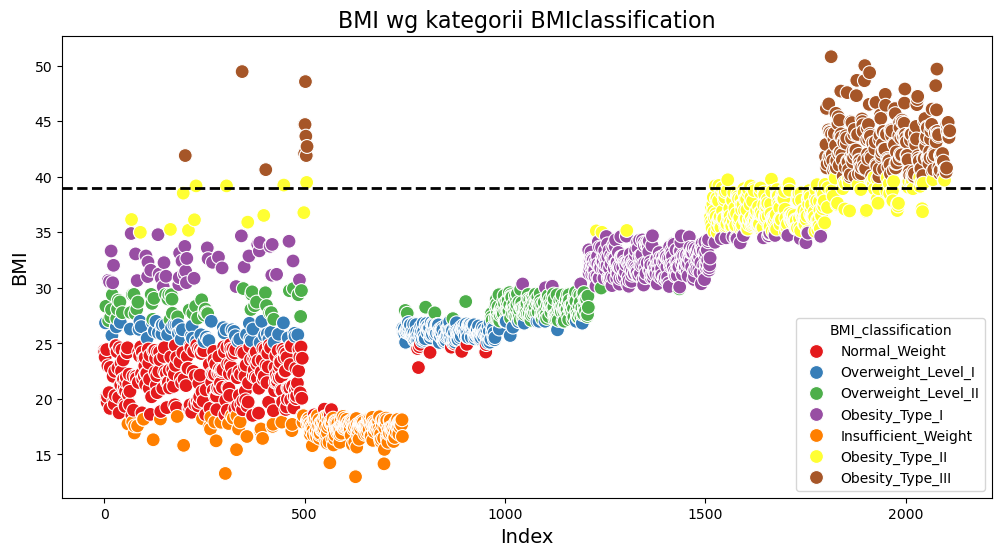

In [180]:
# Scatter plot, który pokazuje kategorię BMI_classification wg BMI
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df.index, y='BMI', hue='BMI_classification', data=df, palette='Set1', s=100)
plt.title('BMI wg kategorii BMIclassification', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.legend(title='BMI_classification')
plt.axhline(y=39, color='black', linestyle='--', linewidth=2, label='BMI = 39')
plt.show()

Porównanie kategoryzacji NObeyesdad i BMI_classification

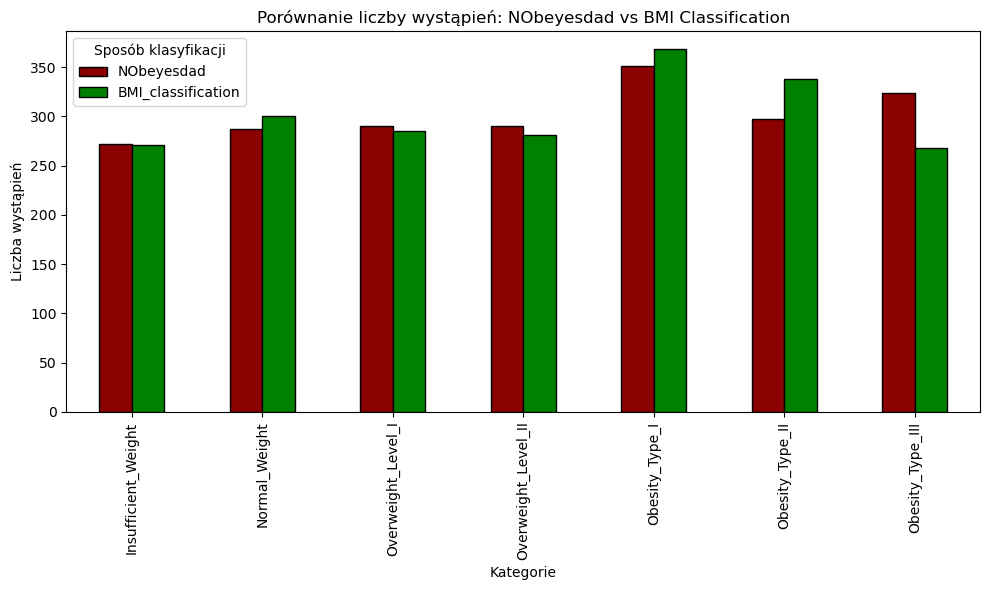

In [181]:
# Zliczenie wystąpień
counts_NObeyesdad = df['NObeyesdad'].value_counts()
counts_BMI_classification = df['BMI_classification'].value_counts()


# Łączenie danych w jeden DataFrame
combined_counts = pd.DataFrame({
    'NObeyesdad': counts_NObeyesdad,
    'BMI_classification': counts_BMI_classification
})

# Ustawienie własnej kolejności kategorii
custom_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II' , 'Obesity_Type_I' , 'Obesity_Type_II' , 'Obesity_Type_III']
combined_counts = combined_counts.reindex(custom_order)

# Tworzenie wykresu
combined_counts.plot(kind='bar', figsize=(10, 6), color=['darkred', 'green'], edgecolor='black')

# Dodanie tytułu i etykiet
plt.title('Porównanie liczby wystąpień: NObeyesdad vs BMI Classification')
plt.xlabel('Kategorie')
plt.ylabel('Liczba wystąpień')
plt.legend(title='Sposób klasyfikacji', loc='upper left')

# Wyświetlenie wykresu
plt.tight_layout()
plt.show()

Liczby wystąpień w kategoriach są zbliżone do oryginalnych. Liczba osób w kategori Obesity_Type_II została przedefiniowana na Obesity_Type_III. W pozostałych kategoriach wartości są zbliżone. \
Przedstawiamy te dane również w postaci tabeli:

In [184]:
df1 = df.groupby("NObeyesdad")[["NObeyesdad"]].count()
df2 = df.groupby("BMI_classification")[["BMI_classification"]].count()

# Zmiana nazwy kolumn
df1.rename(columns={"NObeyesdad": "Count_NObeyesdad"}, inplace=True)
df2.rename(columns={"BMI_classification": "Count_BMIclassification"}, inplace=True)

merged_df = pd.merge(df1, df2, how="inner", left_index=True, right_index=True)

display(merged_df)

,Count_NObeyesdad,Count_BMIclassification
NObeyesdad,,
Insufficient_Weight,272,271
Normal_Weight,287,300
Obesity_Type_I,351,368
Obesity_Type_II,297,338
Obesity_Type_III,324,268
Overweight_Level_I,290,285
Overweight_Level_II,290,281


Dla syntetycznych danych kategorie numeryczne, które miały wartości całkowite zostały wygenerowane w sposób dziesiętny. W związku z tym kolumny Height i Weight zaokrągliliśmy do dwóch miejsc po przecinku, a pozostałe do jedności. \
Usunięta została też kolumna Nobeyesdad, ponieważ w dalszych rozważaniach będziemy wykorzystywali BMI_classification.

In [192]:
df_round = df.round({'Age': 0, 'Height': 2, 'Weight': 2, 'FCVC': 0, 'NCP': 0, 'CH2O': 0, 'FAF': 0, 'TUE': 0})
df_round_drop = df_round.drop(columns = "NObeyesdad")
display(df_round_drop)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI,BMI_classification
0,Female,21.0,1.62,64.00,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,24.386526,Normal_Weight
1,Female,21.0,1.52,56.00,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,24.238227,Normal_Weight
2,Male,23.0,1.80,77.00,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,23.765432,Normal_Weight
3,Male,27.0,1.80,87.00,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,26.851852,Overweight_Level_I
4,Male,22.0,1.78,89.80,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,28.342381,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21.0,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Sometimes,Public_Transportation,44.901475,Obesity_Type_III
2107,Female,22.0,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,43.741923,Obesity_Type_III
2108,Female,23.0,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,43.543817,Obesity_Type_III
2109,Female,24.0,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,3.0,no,1.0,1.0,Sometimes,Public_Transportation,44.071535,Obesity_Type_III


Zmieniliśmy nazwy kolumn na bardziej intuicyjne i zapisaliśmy dane do dalszej eksploracji.

In [194]:
df_renamed = df_round_drop.rename(columns={
    'family_history_with_overweight':'overweight_in_family', 
    'FAVC':'high_cal_food', 
    'FCVC':'vegetables_consumption', 
    'NCP': 'number_of_main_meals', 
    'CAEC': 'consumption_between_meals', 
    'SMOKE': 'is_smoking',
    'CH2O': 'daily_water_consumption',
    'SCC': 'calories_monitoring',
    'FAF': 'physical_activity',
    'TUE': 'time_using_technology',
    'CALC': 'alcohol_consumption',
    'MTRANS': 'prefered_transportation'
})
df_renamed.head()
df_renamed.to_csv("obesity_clear.csv")

### Opis kolumn i wartości

- **Gender:** Gender
    - Available values:
        - Male
        - Female
- **Age:** Age
    - Available values: 14-61
- **Height:** Height
    - Available values: 1.45 - 1.98
- **Weight:** Weight
    - Available values: 39 - 173
- **overweight_in_family:** Information of overweight in family history
  - Available values:
      - Yes
      - No
- **high_cal_food:** Frequent consumption of high caloric food
  - Available values:
      - Yes
      - No
- **vegetables_consumption:** Frequency of consumption of vegetables
    - Available values:
        - 1: Never
        - 2: Sometimes
        - 3: Always
- **number_of_main_meals:**  Number of main meals
    - Available values: 1,2,3,4
- **consumption_between_meals:**  Consumption of food between meals
    - Available values:
        - No
        - Sometimes
        - Frequently
        - Always
- **is_smoking:** Addiction to smoking
  - Available values:
      - Yes
      - No
- **daily_water_consumption:** Consumption of water daily
    - Available values:
      - 1: Less than a liter
      - 2: Between 1 and 2 L
      - 3: More than 2 L
- **calories_monitoring:**  Calories consumption monitoring
  - Available values:
      - Yes
      - No
- **physical_activity:** Physical activity frequency
  - Available values:
    - 0: No activities
    - 1: 1 or 2 days
    - 2: 2 or 4 days
    - 3: 4 or 5 days
- **time_using_technology:**  Time using technology devices
  - Available values:
    - 0: 0–2 hours
    - 1: 3-5 hours
    - 2: more than 5 hours
- **alcohol_consumption:**  Consumption of alcohol
    - Available values:
      - No
      - Sometimes
      - Frequently
      - Always
- **prefered_transportation:**  Transportation used
    - Available values:
      - Automobile
      - Motorbike
      - Bike
      - Public Transportation
      - Walking
- **BMI:** calculated BMI
- **BMI_classification:** classification of BMi
    - Available values:
       - Insufficient_Weight, when BMI < 18.5
       - Normal_Weight, when 18.5 <= BMI < 25
       - Overweight_Level_I, when 25 <= BMI < 27
       - Overweight_Level_II, when 27 <= BMI < 30
       - Obesity_Type_I, when 30 <= BMI < 35
       - Obesity_Type_II, when 35 <= BMI < 40
       - Obesity_Type_III, when BMI >= 40

